In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Input, Dropout

In [3]:
data = pd.read_csv('ABNB_stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'], dayfirst = True)
data.set_index('Date', inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-10,146.000000,165.000000,141.250000,144.710007,144.710007,70447500
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600


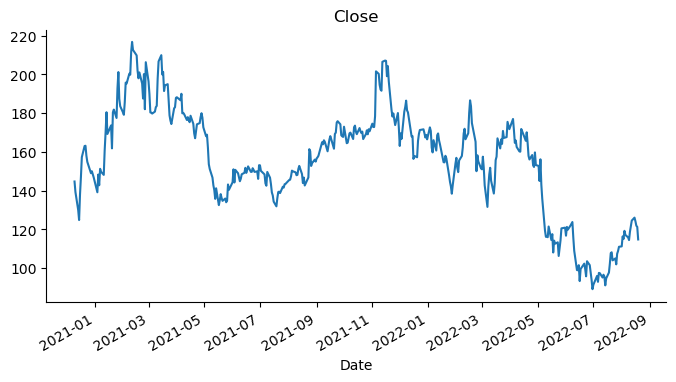

In [4]:
from matplotlib import pyplot as plt
data['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 426 entries, 2020-12-10 to 2022-08-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       426 non-null    float64
 1   High       426 non-null    float64
 2   Low        426 non-null    float64
 3   Close      426 non-null    float64
 4   Adj Close  426 non-null    float64
 5   Volume     426 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.3 KB


In [6]:
df1 = pd.DataFrame(data['Close'])
data = df1.values

#test scale first
scaler = StandardScaler()
data = scaler.fit_transform(data)

train_test_split = int(np.ceil(0.65 * len(data)))
train_data = data[:train_test_split]
test_data = data[train_test_split:]
print('Train Data:', train_data.shape)
print('Test Data:', test_data.shape)

Train Data: (277, 1)
Test Data: (149, 1)


In [7]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [8]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [9]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=5))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=5, epochs=200)

D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.4718
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1911
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1381
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.1493
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1546
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.1221
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1110
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1413
Epoch 9/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1202
Epoch 10/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1081
Epoch 11/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0748
Epoch 12/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0952
Epoch 13/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0699
Epoch 14/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0762
Epoch 15/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - lo

In [10]:
y_train = scaler.inverse_transform(y_train)
y_train_predict = model.predict(x_train)
y_train_predict = scaler.inverse_transform(y_train_predict)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


In [11]:
lstm_r2 = r2_score(y_train, y_train_predict)
lstm_mse = mean_squared_error(y_train, y_train_predict)
lstm_mae = mean_absolute_error(y_train, y_train_predict)

print('MSE:', lstm_mse)
print('MAE:', lstm_mae)
print('R2 Score:', lstm_r2)

MSE: 17.442724664770378
MAE: 3.139373006527218
R2 Score: 0.945012164605212
